In [1]:
from transformers import pipeline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

c:\Users\b.ludwicki\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
#Basic usage
classifier = pipeline("sentiment-analysis")
print(type(classifier))

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.0.1+cu118 with CUDA 1108 (you have 2.0.1+cpu)
    Python  3.11.3 (you have 3.11.4)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


<class 'transformers.pipelines.text_classification.TextClassificationPipeline'>


In [4]:
opinions = ["This is far better than the manual brush . The price is better than what’s on the oral B website . Never going back to manual brush for my son!", "Works as described, improvement scene to gum heath after continued use"]
print(classifier(opinions))

[{'label': 'POSITIVE', 'score': 0.9950537085533142}, {'label': 'NEGATIVE', 'score': 0.7859491109848022}]


In [5]:
import torch

In [6]:
#turn on a dataframe from the .csv file
csvpath = "AirlineTweets.csv"
#view the dataframe
df = pd.read_csv(csvpath)
#filter the dataframe using the "airline sentiment" and "text" columns
df.filter(items = ["airline_sentiment","text"])

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
2605,negative,@united no I did not make connection. Your st...
2606,negative,@united Of course. That was the start of my tr...
2607,negative,@united no u don't
2608,negative,@united how much longer will it take? It a gui...


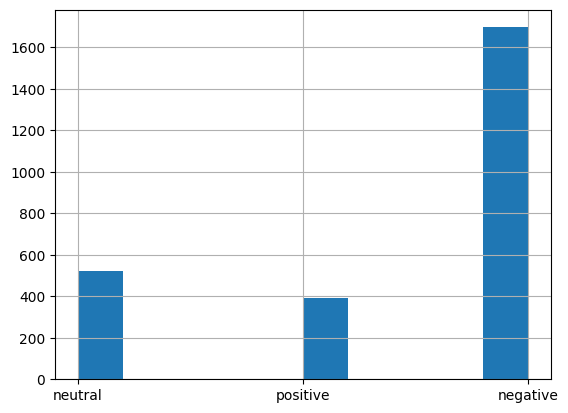

In [7]:
#plot a histogram to see the data (of the sentiment)
df["airline_sentiment"].hist()
#usuwamy z dfa neutral i tworzymy jego kopię
df = df[df.airline_sentiment != "neutral"].copy()

In [8]:
#wyciągamy z df tylko potrzebne kolumny
df = df.filter(items = ["airline_sentiment","text"]).copy()
#map the labels to integers (1,0) by creating a dictionary which maps "positive" to 1 and "negative" to "0" and call the map function to add it to df?
boolmapping = {"positive": 1, "negative": 0}
df["boolmapping"] = df["airline_sentiment"].map(boolmapping)
#call the head function again to view the changes
df.head()
#check the length of df

,airline_sentiment,text,boolmapping
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [11]:
#grab the text column and turn it into a list (make it into a variable "text")
col_list =  list(df["text"])
#run the classifier on the text
predictions = classifier(col_list)

In [12]:
print(predictions)

[{'label': 'POSITIVE', 'score': 0.6070874333381653}, {'label': 'NEGATIVE', 'score': 0.9973449110984802}, {'label': 'NEGATIVE', 'score': 0.9995823502540588}, {'label': 'NEGATIVE', 'score': 0.9854251742362976}, {'label': 'POSITIVE', 'score': 0.9553210139274597}, {'label': 'POSITIVE', 'score': 0.9827088117599487}, {'label': 'POSITIVE', 'score': 0.9994851350784302}, {'label': 'POSITIVE', 'score': 0.9993509650230408}, {'label': 'POSITIVE', 'score': 0.9940821528434753}, {'label': 'POSITIVE', 'score': 0.9863133430480957}, {'label': 'POSITIVE', 'score': 0.9996304512023926}, {'label': 'NEGATIVE', 'score': 0.9980512857437134}, {'label': 'POSITIVE', 'score': 0.9964436888694763}, {'label': 'NEGATIVE', 'score': 0.9968666434288025}, {'label': 'POSITIVE', 'score': 0.9787647724151611}, {'label': 'POSITIVE', 'score': 0.9995218515396118}, {'label': 'NEGATIVE', 'score': 0.9954516291618347}, {'label': 'POSITIVE', 'score': 0.9995624423027039}, {'label': 'POSITIVE', 'score': 0.9998748302459717}, {'label': '

In [24]:
#create a list of values for each label P or N in each dictionary using a loop and print it

lista = []

#for each element in the list 'predictions' 
for prediction in predictions:
    #if the key 'label' in the dictionary is positive
    if prediction['label'] == "POSITIVE":
        #the value should = 1
        v = 1
    #if the key 'label' in the dictionary is negative
    elif prediction['label'] == "NEGATIVE":
        #the value should = 1
        v = 0
    else:
        print('unexpected key')
    #append the list
    lista.append(v)            

print(lista)

[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 

In [25]:
#add the list from last step into a dataframe as column "target" and show the table
df['target'] = lista
df.head()

,airline_sentiment,text,boolmapping,target
1,positive,@VirginAmerica plus you've added commercials t...,1,1
3,negative,@VirginAmerica it's really aggressive to blast...,0,0
4,negative,@VirginAmerica and it's a really big bad thing...,0,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1,1


In [26]:
len(df)

2087

In [27]:
#create a list based on text column and name it "texts"
texts = df['text'].tolist()
#run a classifier on the newly created list
predi = classifier(texts)
#print the values
print(predi)

[{'label': 'POSITIVE', 'score': 0.6070874333381653}, {'label': 'NEGATIVE', 'score': 0.9973449110984802}, {'label': 'NEGATIVE', 'score': 0.9995823502540588}, {'label': 'NEGATIVE', 'score': 0.9854251742362976}, {'label': 'POSITIVE', 'score': 0.9553210139274597}, {'label': 'POSITIVE', 'score': 0.9827088117599487}, {'label': 'POSITIVE', 'score': 0.9994851350784302}, {'label': 'POSITIVE', 'score': 0.9993509650230408}, {'label': 'POSITIVE', 'score': 0.9940821528434753}, {'label': 'POSITIVE', 'score': 0.9863133430480957}, {'label': 'POSITIVE', 'score': 0.9996304512023926}, {'label': 'NEGATIVE', 'score': 0.9980512857437134}, {'label': 'POSITIVE', 'score': 0.9964436888694763}, {'label': 'NEGATIVE', 'score': 0.9968666434288025}, {'label': 'POSITIVE', 'score': 0.9787647724151611}, {'label': 'POSITIVE', 'score': 0.9995218515396118}, {'label': 'NEGATIVE', 'score': 0.9954516291618347}, {'label': 'POSITIVE', 'score': 0.9995624423027039}, {'label': 'POSITIVE', 'score': 0.9998748302459717}, {'label': '

In [28]:
#Dla każdej pozytywnej wartości w każdym słowniku, prawdopodobieństwo wynosi jej obecny score. Dla każdej negatywnej wartości, prawdopodobieństwo wynosi
#1-jej obecny score.
probs = []

#for each dictionary in the list predictions
for d in predi:
    if d["label"].startswith ("P"):
        o = d["score"]
    else:
        o = 1-d["score"]
    #append the probs list with the appropriate value d
    probs.append(o)

print (probs)

[0.6070874333381653, 0.0026550889015197754, 0.0004176497459411621, 0.014574825763702393, 0.9553210139274597, 0.9827088117599487, 0.9994851350784302, 0.9993509650230408, 0.9940821528434753, 0.9863133430480957, 0.9996304512023926, 0.001948714256286621, 0.9964436888694763, 0.0031333565711975098, 0.9787647724151611, 0.9995218515396118, 0.004548370838165283, 0.9995624423027039, 0.9998748302459717, 0.004880666732788086, 0.0004048943519592285, 0.0006322264671325684, 0.01542818546295166, 0.01828092336654663, 0.0004482865333557129, 0.0023748278617858887, 0.9934479594230652, 0.9976067543029785, 0.8661726713180542, 0.0003237724304199219, 0.8415601849555969, 0.0032317638397216797, 0.9997846484184265, 0.17614597082138062, 0.9993895292282104, 0.09156608581542969, 0.004861712455749512, 0.9997820258140564, 0.0014235973358154297, 0.004673957824707031, 0.00464242696762085, 0.019041001796722412, 0.9911696910858154, 0.0125504732131958, 0.00809931755065918, 0.9994875192642212, 0.9327112436294556, 0.0392573

In [29]:
preds = []

for d in predi:
    if d['label'].startswith('P'):
        o = 1
    else:
        o = 0
    preds.append(o)

preds = np.array(preds)

print(preds)


[1 0 0 ... 0 0 0]


In [30]:
print("acc:", np.mean(df['target'] == preds))

acc: 1.0


In [32]:
cm = confusion_matrix(df['target'], preds, normalize ='true')
cm

array([[1., 0.],
       [0., 1.]])